### Stock Price prediction model

In [135]:
import pandas as pd
from typing import List
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

In [136]:
# load CSV file
df = pd.read_csv('Stockprice.csv')

#### Data Prepossessing

In [137]:
# type of data
print(df.dtypes)

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object


In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      949 non-null    object 
 1   Price     949 non-null    float64
 2   Open      949 non-null    float64
 3   High      949 non-null    float64
 4   Low       949 non-null    float64
 5   Vol.      948 non-null    object 
 6   Change %  949 non-null    object 
dtypes: float64(4), object(3)
memory usage: 52.0+ KB


In [139]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/02/2023,286.6,286.6,286.6,286.6,6.30K,0.00%
1,02/01/2023,286.6,286.6,286.6,286.6,2.60K,0.00%
2,01/31/2023,286.6,286.6,286.6,286.6,9.13K,0.00%
3,01/30/2023,286.6,286.6,286.6,286.6,7.16K,0.00%
4,01/29/2023,286.6,286.6,286.6,286.6,4.99K,0.00%


In [140]:
# Remove % sign from the data
df['Change %'] = df['Change %'].str.replace('%', '')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/02/2023,286.6,286.6,286.6,286.6,6.30K,0.00
1,02/01/2023,286.6,286.6,286.6,286.6,2.60K,0.00
2,01/31/2023,286.6,286.6,286.6,286.6,9.13K,0.00
3,01/30/2023,286.6,286.6,286.6,286.6,7.16K,0.00
4,01/29/2023,286.6,286.6,286.6,286.6,4.99K,0.00


In [141]:
# Remove K sign from the data
df['Vol.'] = df['Vol.'].str.replace('K', '')

In [142]:
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,02/02/2023,286.6,286.6,286.6,286.6,6.30,0.00
1,02/01/2023,286.6,286.6,286.6,286.6,2.60,0.00
2,01/31/2023,286.6,286.6,286.6,286.6,9.13,0.00
3,01/30/2023,286.6,286.6,286.6,286.6,7.16,0.00
4,01/29/2023,286.6,286.6,286.6,286.6,4.99,0.00


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      949 non-null    object 
 1   Price     949 non-null    float64
 2   Open      949 non-null    float64
 3   High      949 non-null    float64
 4   Low       949 non-null    float64
 5   Vol.      948 non-null    object 
 6   Change %  949 non-null    object 
dtypes: float64(4), object(3)
memory usage: 52.0+ KB


In [144]:
def convert_to_float(val):
    try:
        return float(val)
    except ValueError:
        return 0.0

In [145]:
df['Vol.'] = df['Vol.'].apply(convert_to_float)


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      949 non-null    object 
 1   Price     949 non-null    float64
 2   Open      949 non-null    float64
 3   High      949 non-null    float64
 4   Low       949 non-null    float64
 5   Vol.      948 non-null    float64
 6   Change %  949 non-null    object 
dtypes: float64(5), object(2)
memory usage: 52.0+ KB


In [147]:
df['Change %'] = df['Change %'].apply(convert_to_float)


In [148]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      949 non-null    object 
 1   Price     949 non-null    float64
 2   Open      949 non-null    float64
 3   High      949 non-null    float64
 4   Low       949 non-null    float64
 5   Vol.      948 non-null    float64
 6   Change %  949 non-null    float64
dtypes: float64(6), object(1)
memory usage: 52.0+ KB


C:\Users\Mostafizur\AppData\Local\Temp\ipykernel_14372\3026126805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Change %'], fit=stats.norm)


<AxesSubplot:xlabel='Change %', ylabel='Density'>

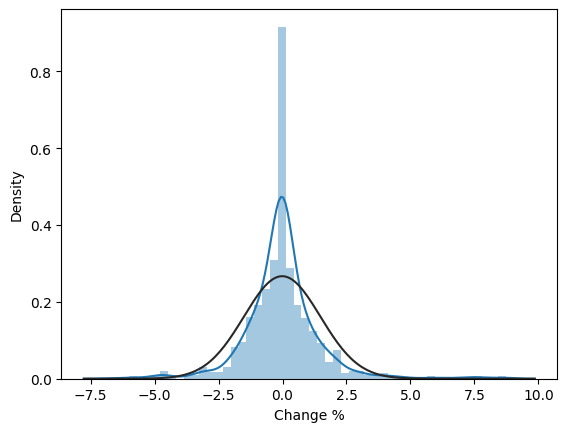

In [149]:
# Plot the data to see the distribution
sns.distplot(df['Change %'], fit=stats.norm)
 

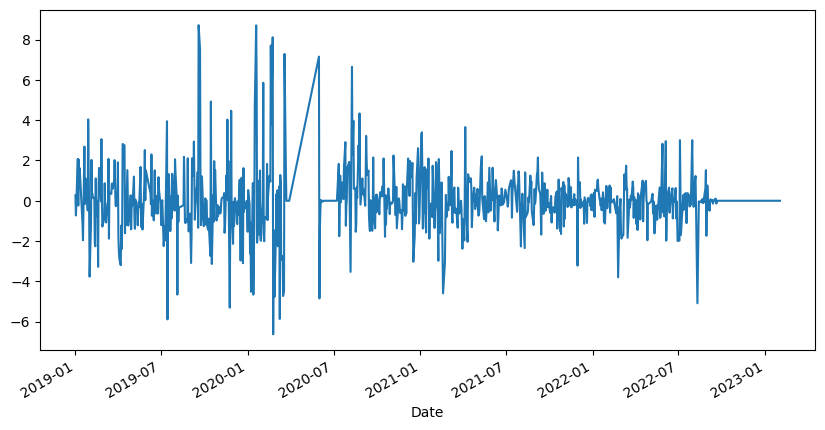

In [150]:
# time series data plot
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df['Change %'].plot(figsize=(10, 5))
plt.show()
 

In [152]:
# feature engineering
df['Change %'] = df['Change %'].apply(lambda x: 1 if x > 0 else 0)
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-02-02,286.6,286.6,286.6,286.6,6.30,0
2023-02-01,286.6,286.6,286.6,286.6,2.60,0
2023-01-31,286.6,286.6,286.6,286.6,9.13,0
2023-01-30,286.6,286.6,286.6,286.6,7.16,0
2023-01-29,286.6,286.6,286.6,286.6,4.99,0


In [154]:
# print the number of features
print('Number of features: {}'.format(df.shape[1]))

Number of features: 6


In [155]:
# relationship between features
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
 

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.987428,0.997268,0.997254,0.088035,0.203348
Open,0.987428,1.000000,0.989482,0.989931,0.070812,0.138751
High,0.997268,0.989482,1.000000,0.994010,0.116046,0.186948
Low,0.997254,0.989931,0.994010,1.000000,0.058194,0.170555
Vol.,0.088035,0.070812,0.116046,0.058194,1.000000,0.161463
Change %,0.203348,0.138751,0.186948,0.170555,0.161463,1.000000


In [151]:
#drop Date
df.drop('Date', axis=1, inplace=True)

KeyError: "['Date'] not found in axis"

In [ ]:
df.head()

,Price,Open,High,Low,Vol.,Change %
0,286.6,286.6,286.6,286.6,6.30,0.0
1,286.6,286.6,286.6,286.6,2.60,0.0
2,286.6,286.6,286.6,286.6,9.13,0.0
3,286.6,286.6,286.6,286.6,7.16,0.0
4,286.6,286.6,286.6,286.6,4.99,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     949 non-null    float64
 1   Open      949 non-null    float64
 2   High      949 non-null    float64
 3   Low       949 non-null    float64
 4   Vol.      948 non-null    float64
 5   Change %  949 non-null    float64
dtypes: float64(6)
memory usage: 44.6 KB


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     949 non-null    float64
 1   Open      949 non-null    float64
 2   High      949 non-null    float64
 3   Low       949 non-null    float64
 4   Vol.      948 non-null    float64
 5   Change %  949 non-null    float64
dtypes: float64(6)
memory usage: 44.6 KB


In [ ]:
# Check null values
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [ ]:
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        1
Change %    0
dtype: int64

In [ ]:
# Change null value to 0
df.fillna(0, inplace=True)

In [ ]:
# Change all values to int
#df = df.astype(int)

### Data processing and visualization for Accuracy and Loss

In [ ]:
# Check null values
df.isnull().sum()

Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [ ]:
# Check duplicate values
df.duplicated().sum()

2

<AxesSubplot:xlabel='Open'>

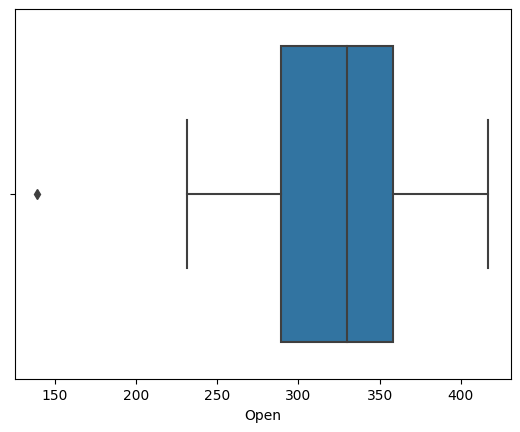

In [ ]:
# Check Outliers
sns.boxplot(x=df['Open'])
 

In [ ]:
# Count Coulmns
df.count()

Price       949
Open        949
High        949
Low         949
Vol.        949
Change %    949
dtype: int64

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949 entries, 0 to 948
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     949 non-null    float64
 1   Open      949 non-null    float64
 2   High      949 non-null    float64
 3   Low       949 non-null    float64
 4   Vol.      949 non-null    float64
 5   Change %  949 non-null    float64
dtypes: float64(6)
memory usage: 44.6 KB


In [ ]:
df.head()

,Price,Open,High,Low,Vol.,Change %
0,286.6,286.6,286.6,286.6,6.30,0.0
1,286.6,286.6,286.6,286.6,2.60,0.0
2,286.6,286.6,286.6,286.6,9.13,0.0
3,286.6,286.6,286.6,286.6,7.16,0.0
4,286.6,286.6,286.6,286.6,4.99,0.0


In [ ]:
# Check Correlation
df.corr()
 

,Price,Open,High,Low,Vol.,Change %
Price,1.000000,0.987428,0.997268,0.997254,0.085983,0.054438
Open,0.987428,1.000000,0.989482,0.989931,0.068831,-0.044137
High,0.997268,0.989482,1.000000,0.994010,0.114062,0.018509
Low,0.997254,0.989931,0.994010,1.000000,0.056099,0.011842
Vol.,0.085983,0.068831,0.114062,0.056099,1.000000,0.026614
Change %,0.054438,-0.044137,0.018509,0.011842,0.026614,1.000000


<AxesSubplot:>

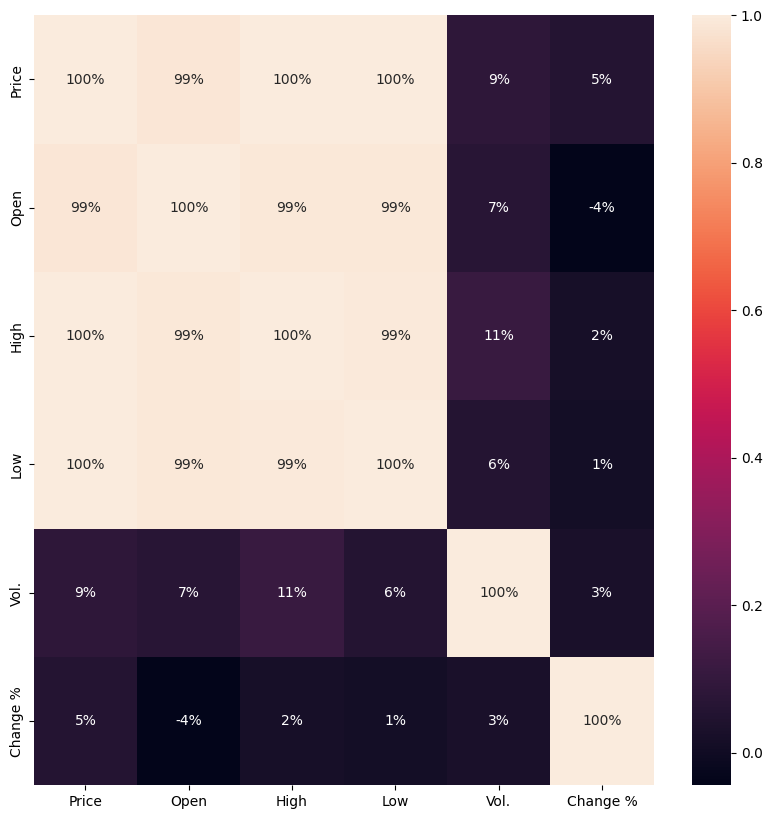

In [ ]:
# Correlation Heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='.0%')
 

#### Algorithm